### [ 데이터 분포 시각화 및 형태 확인] 
- 분포 시각화 : 히스토그램
- 형태 수치화 : 왜도(skew)- 쏠림 정도, 첨도(kurt)- 뽀족함 정도

[1] 데이터 분포 확인 및 시각화 <hr>

In [1]:
## =============================================
## 모듈 로딩
## =============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import skew, kurtosis   ## 왜도/첨도 계산용 함수



In [2]:
## =============================================
##  예제 데이터 만들기
## =============================================
## 데이터 재현성 설정
np.random.seed(42)

## 표준정규분포(평균0, 표준편차 1)에 가까운 예제 데이터 1000개
data_normal = np.random.normal(loc=0, scale=1, size=1000)

## 오른쪽으로 긴 꼬리를 가진 치우친 데이터 (지수분포)
data_skewed = np.random.exponential(scale=1, size=1000)

## pandas Series로 변환
normalSR = pd.Series(data_normal, name="normal")
skewedSR = pd.Series(data_skewed, name="skewed")

In [3]:
## =============================================
##  왜도, 첨도 계산
## => 데이터의 형태/분포/쏠림정도 체크
## => scipy.stats.skew, kurtosis
##    pandas SR/DF.skew(), SR/DF.kurt()
## =============================================
def print_stats(series):
    ## ndarray 타입 
    x = series.values

    ## 평균, 표준편차(ddof=1 불편분산, 표본 데이터이기때문)
    mean = x.mean()
    std = x.std(ddof=1)

    ## 왜도 (skewness) : 비대칭 정도
    sk = skew(x, bias=False)          # bias=False: 표본 기준 불편추정

    ## 첨도 (kurtosis) : 뽀족 정도 -> 이상치 체크
    ku = kurtosis(x, fisher=True, bias=False)
    #  - fisher=True : 정규분포 기준 0이 되도록(초과첨도, excess kurtosis)
    #  - fisher=False: 정규분포 기준 3

    print(f"=== {series.name} 데이터 통계 ===")
    print(f"  개수     : {len(x)}")
    print(f"  평균     : {mean:.3f}")
    print(f"  표준편차  : {std:.3f}")
    print(f"  왜도     : {sk:.3f}")
    print(f"  첨도(초과): {ku:.3f}  (정규분포는 0 근처)")
    print()


## 데이터별 통계 정보 출력
print_stats(normalSR)
print_stats(skewedSR)


=== normal 데이터 통계 ===
  개수     : 1000
  평균     : 0.019
  표준편차  : 0.979
  왜도     : 0.117
  첨도(초과): 0.073  (정규분포는 0 근처)

=== skewed 데이터 통계 ===
  개수     : 1000
  평균     : 1.008
  표준편차  : 1.003
  왜도     : 1.984
  첨도(초과): 5.412  (정규분포는 0 근처)



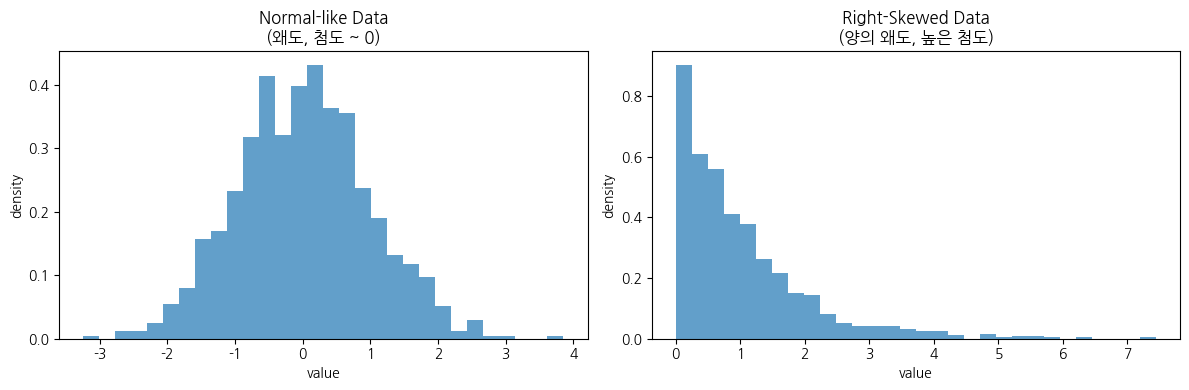

In [4]:
## =============================================
## 데이터 분포 시각화 - 히스토그램
## =============================================
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

##- 정규분포 데이터 히스토그램
axes[0].hist(normalSR, bins=30, density=True, alpha=0.7)
axes[0].set_title("Normal-like Data\n(왜도, 첨도 ~ 0)")
axes[0].set_xlabel("value")
axes[0].set_ylabel("density")

##- 치우친 데이터 히스토그램
axes[1].hist(skewedSR, bins=30, density=True, alpha=0.7)
axes[1].set_title("Right-Skewed Data\n(양의 왜도, 높은 첨도)")
axes[1].set_xlabel("value")
axes[1].set_ylabel("density")

plt.tight_layout()
plt.show()


[2] 정규분포로 변환 후 시각화<hr>

In [5]:
## 모듈 로딩 
from scipy.stats import boxcox, probplot

In [6]:
## ====================================================
## 치우친 데이터 생성 (지수분포: 오른쪽 긴 꼬리)
## ====================================================
print_stats(skewedSR)


## ====================================================
## 로그 변환 (log transform) 
## - 적용 : x > 0인 데이터에 사용 가능
## ====================================================
# 0 방지용으로 아주 작은 값 더해줌
x_log = np.log(skewedSR + 1e-6)  

print_stats(pd.Series(x_log))


## ====================================================
## Box-Cox 변환
## - 적용 : x > 0이어야 함
## - 방법 : λ(람다)를 자동으로 추정해서 정규성에 더 가깝게 변환
## ====================================================
# 지수분포 데이터는 이미 > 0 이므로 바로 사용 가능
x_boxcox, lam = boxcox(skewedSR)

print_stats(pd.Series(x_boxcox))






=== skewed 데이터 통계 ===
  개수     : 1000
  평균     : 1.008
  표준편차  : 1.003
  왜도     : 1.984
  첨도(초과): 5.412  (정규분포는 0 근처)

=== skewed 데이터 통계 ===
  개수     : 1000
  평균     : -0.557
  표준편차  : 1.249
  왜도     : -0.928
  첨도(초과): 1.027  (정규분포는 0 근처)

=== None 데이터 통계 ===
  개수     : 1000
  평균     : -0.356
  표준편차  : 1.007
  왜도     : -0.045
  첨도(초과): -0.321  (정규분포는 0 근처)



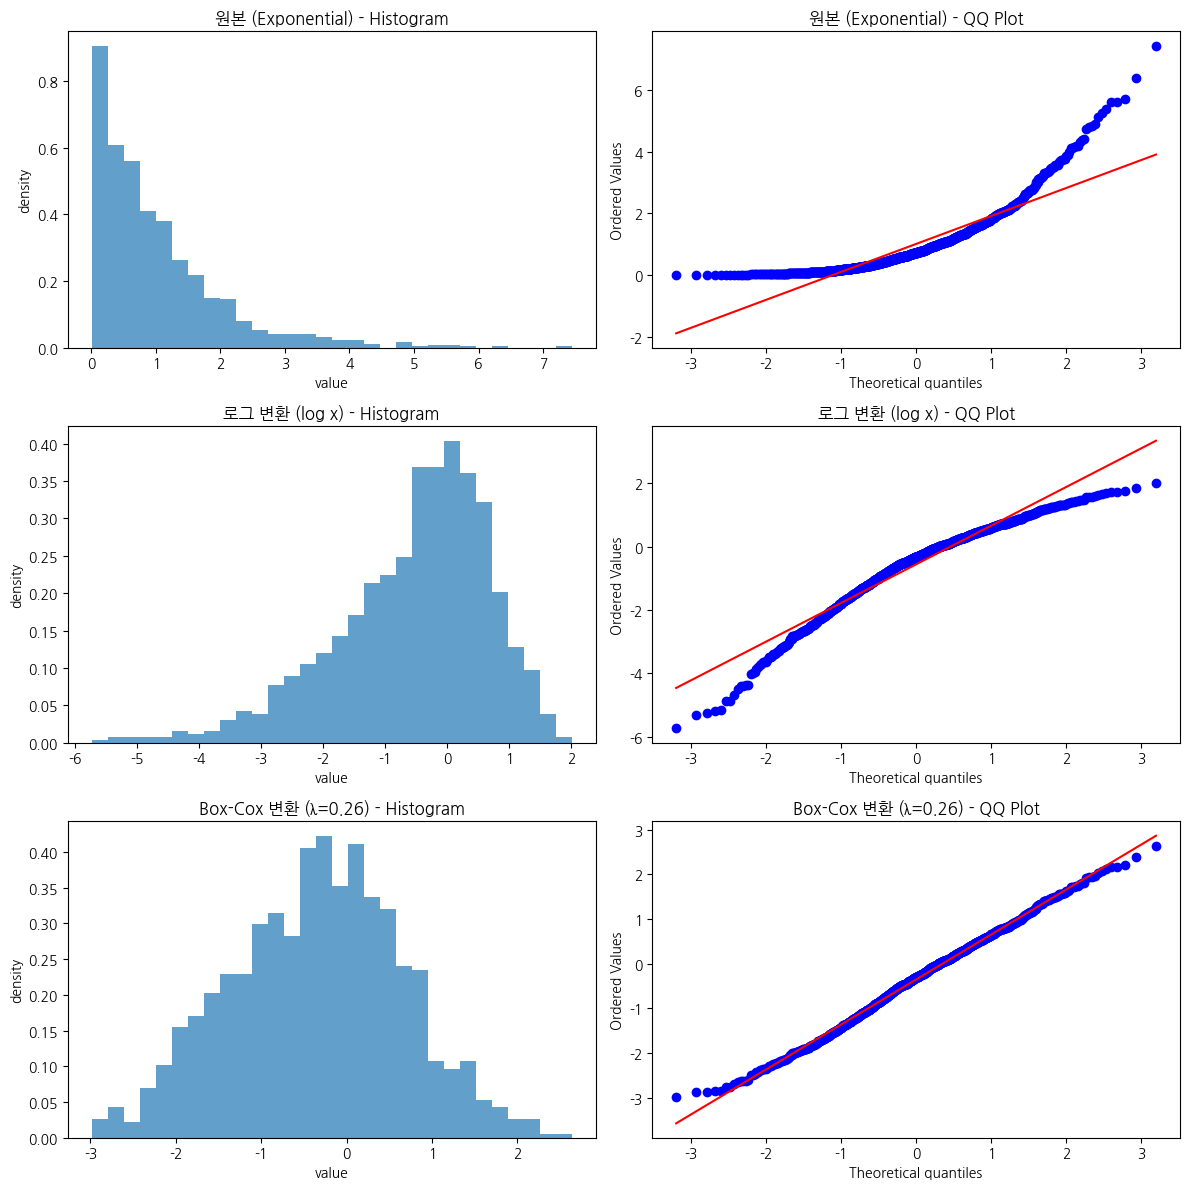

In [7]:
## ====================================================
## 시각화: 히스토그램 + QQ Plot
## ====================================================
## QQ Plot(Quantile–Quantile Plot)
## -> 데이터가 특정 분포(보통 정규분포)를 따르는지 시각적으로 
## -> 판단하기 위한 그래프
## ====================================================
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
x = skewedSR.values
data_list = [ (x, "원본 (Exponential)"),
              (x_log, "로그 변환 (log x)"),
              (x_boxcox, f"Box-Cox 변환 (λ={lam:.2f})"),
]

for row, (data, title) in enumerate(data_list):
    ## - 히스토그램
    ax_hist = axes[row, 0]
    ax_hist.hist(data, bins=30, density=True, alpha=0.7)
    ax_hist.set_title(f"{title} - Histogram")
    ax_hist.set_xlabel("value")
    ax_hist.set_ylabel("density")

    ## - QQ Plot (정규분포와 비교)
    ax_qq = axes[row, 1]
    probplot(data, dist="norm", plot=ax_qq)
    ax_qq.set_title(f"{title} - QQ Plot")

plt.tight_layout()
plt.show()
